In [1]:
import os

import pandas as pd
import pickle as pkl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy

%matplotlib inline
cmap = sns.diverging_palette(10, 240, as_cmap=True)

### Helper Functions + Settings (Load Data)

In [2]:
def load_data(run_name='1'):
    path = '../data/' + run_name + '/scores/'
    scores = []
    i = 0

    for file in os.listdir(path):
        if file.endswith('.p'):
            score_dict = pkl.load(open(path + '/' + file, 'rb'))        
            missing = 0

            if file.startswith('m'):
                split_file = file.split('_')
                missing = float(split_file[0][1:])
                split_file = split_file[1:]  
            else:
                split_file = file.split('_')

            for s in score_dict.keys():
                score = {}
                score['missing'] = missing
                score['model'] = int(split_file[0])
                score['effects'] = int(split_file[1])
                score['per_effect'] = int(split_file[2])
                score['mag'] = float(split_file[3])
                score['observed'] = int(split_file[4])
                score['trial'] = int(split_file[5].split('.')[0])+1
                score['patients'] = s

                for m in score_dict[s]:
                    score[m] = np.mean(score_dict[s][m])

                scores.append(score)

    df = pd.DataFrame(scores)
    print(df.columns)
    df = df.rename(columns={'fullrfc': 'Random Forest', 'rfc': 'Limited Random Forest', 
                            'nearest_neighbors': 'Nearest Neighbors', 'svm': 'SVM', 
                            'tree': 'Decision Tree', 'da_10000_2_fullrfc': 'DA (2)',
                            'da_10000_4_fullrfc': 'DA (4)', 'da_10000_8_fullrfc': 'DA (8)',
                            'da_10000_16_fullrfc': 'DA (16)'})
    df['diff'] = df[da_classifier] - df[comparison_classifier]
    df = df[np.isfinite(df['missing'])]
    return df

font = {'weight' : 'bold',
        'size'   : 24}
da_classifier = "DA (2)"
comparison_classifier = "SVM"


### Figure 2

Magnitude = 2 to clean up noise

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'effects', 'fullrfc', 'mag',
       'missing', 'model', 'nearest_neighbors', 'observed', 'patients',
       'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


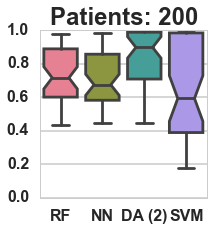

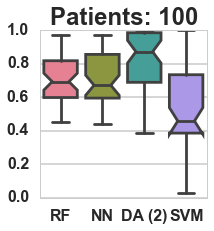

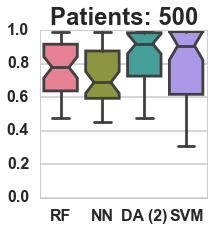

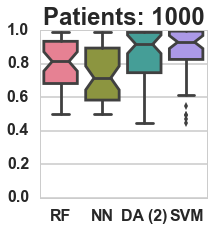

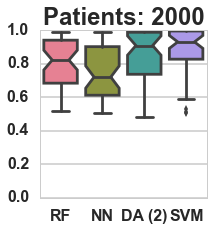

In [3]:
df = load_data('1')

for p in df['patients'].unique():
    df_select = df.loc[(df['patients'] == p) & (df['mag'] == 2)]
    four_col = df_select[['Random Forest', 'Nearest Neighbors', 'DA (2)', 'SVM']] #, 'da_2000_2_tree', 'svm']]
    four_col = four_col.rename(columns={'Random Forest':'RF', 'DA (10000)':'DA',
                       'Nearest Neighbors': 'NN', 'svm': 'SVM'})
    
    plt.figure(figsize=(3,3), )
    plt.rc('font', **font)
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=four_col, notch=True, palette="husl")
    g.set_ylim([0, 1])
    g.set_title('Patients: ' + str(p), fontdict=font)

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'effects', 'fullrfc', 'mag',
       'missing', 'model', 'nearest_neighbors', 'observed', 'patients',
       'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


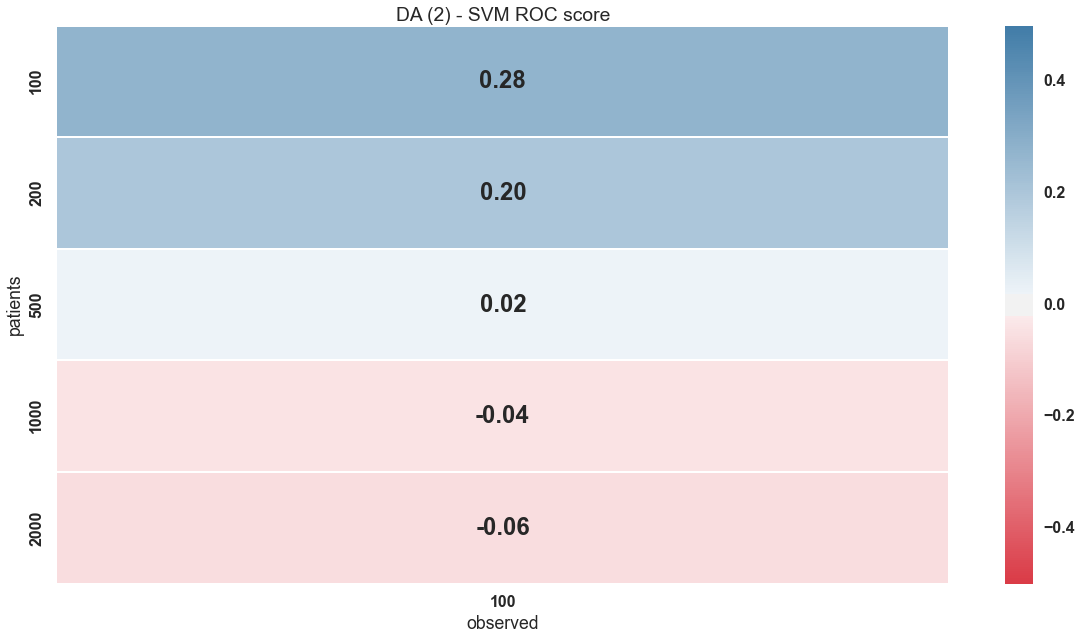

In [4]:
df = load_data('1')
plt.figure(figsize=(20,10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="observed", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt=".2f", vmin=-0.5, vmax=0.5, cmap=cmap, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score') 

### Figure 3

A.) Model 2

Index(['da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_1_fullrfc', 'da_10000_1_nearest_neighbors', 'da_10000_1_rfc',
       'da_10000_1_svm', 'da_10000_1_tree', 'da_10000_2_fullrfc',
       'da_10000_2_nearest_neighbors', 'da_10000_2_rfc', 'da_10000_2_svm',
       'da_10000_2_tree', 'da_10000_4_fullrfc', 'da_10000_4_nearest_neighbors',
       'da_10000_4_rfc', 'da_10000_4_svm', 'da_10000_4_tree',
       'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors', 'da_10000_8_rfc',
       'da_10000_8_svm', 'da_10000_8_tree', 'effects', 'fullrfc', 'mag',
       'missing', 'model', 'nearest_neighbors', 'observed', 'patients',
       'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')
RF        0.542900
NN        0.526933
SVM       0.539866
DA (8)    0.579794
DA (4)    0.591621
DA (2)    0.582560
dtype: float64


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


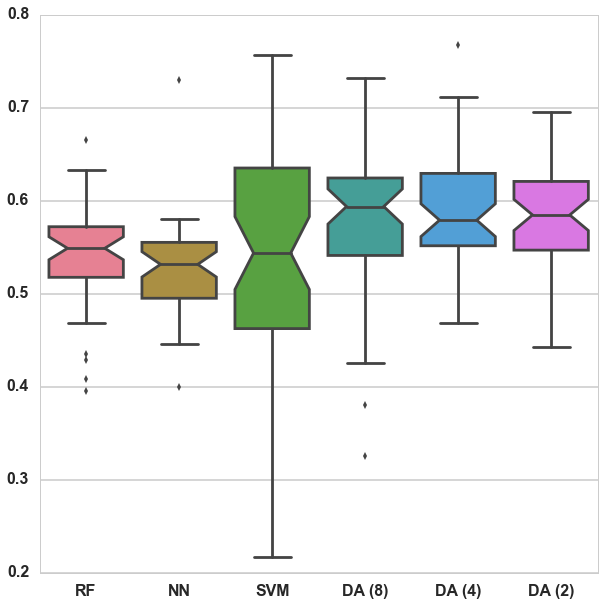

In [5]:
df = load_data('2')
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier, 
               'DA (8)', 'DA (4)', 'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})
results_df = four_col.loc[(four_col['effects'] == 2)]
results_df.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

print(results_df.mean())
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)
# g.set_title('ROC AUC - Model 2')

Index(['da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_1_fullrfc', 'da_10000_1_nearest_neighbors', 'da_10000_1_rfc',
       'da_10000_1_svm', 'da_10000_1_tree', 'da_10000_2_fullrfc',
       'da_10000_2_nearest_neighbors', 'da_10000_2_rfc', 'da_10000_2_svm',
       'da_10000_2_tree', 'da_10000_4_fullrfc', 'da_10000_4_nearest_neighbors',
       'da_10000_4_rfc', 'da_10000_4_svm', 'da_10000_4_tree',
       'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors', 'da_10000_8_rfc',
       'da_10000_8_svm', 'da_10000_8_tree', 'effects', 'fullrfc', 'mag',
       'missing', 'model', 'nearest_neighbors', 'observed', 'patients',
       'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')
[ 2.]
RF        0.502800
NN        0.501111
SVM       0.499583
DA (8)    0.503158
DA (4)    0.473473
DA (2)    0.497584
dtype: float64
RF        0.562616
NN        0.540426
SVM       0.530093
DA (8)    0.573412


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


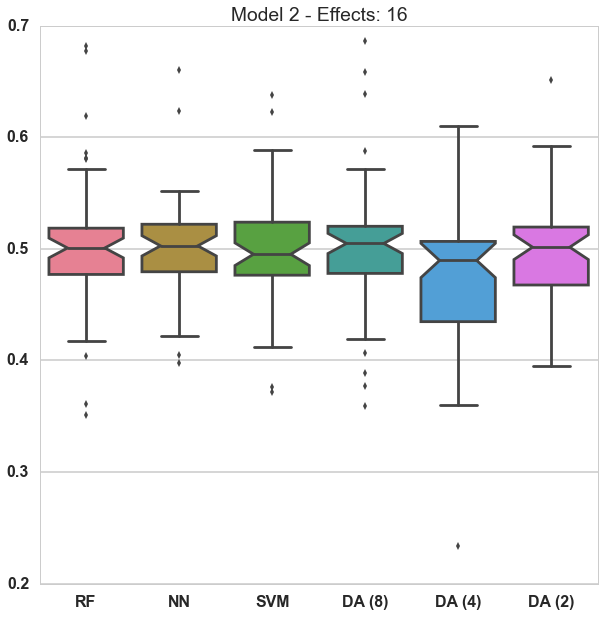

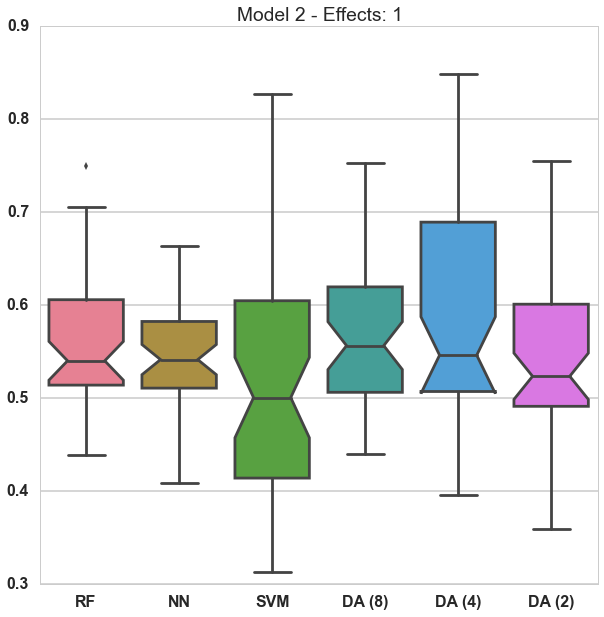

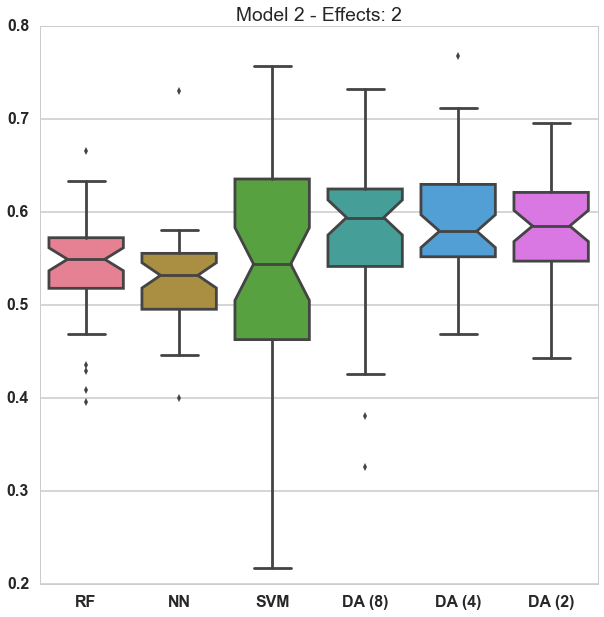

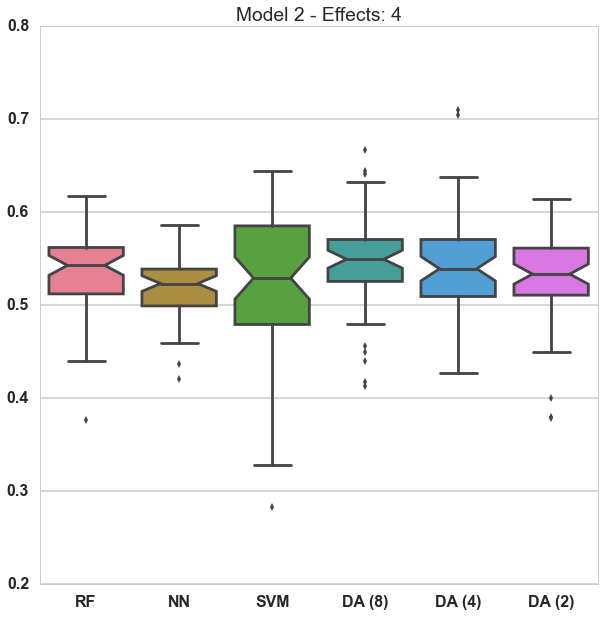

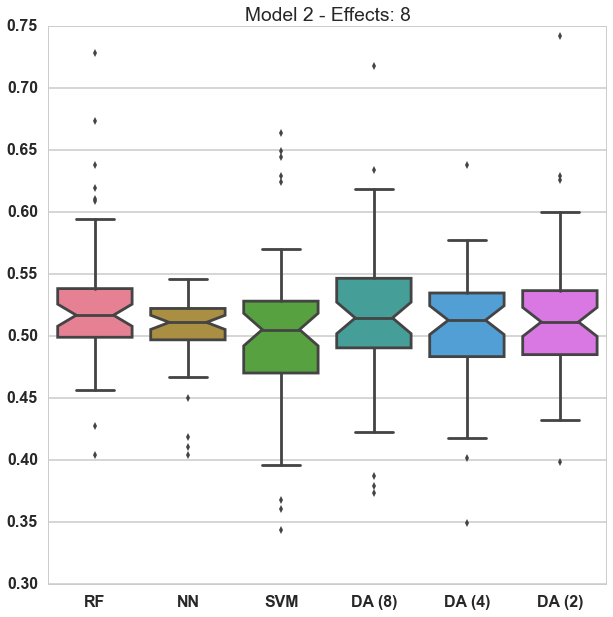

In [6]:
df = load_data('2')
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier, 
               'DA (8)', 'DA (4)', 'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

print(four_col['mag'].unique())

for e in four_col['effects'].unique():
    results_df = pd.DataFrame()
    df_select = four_col.loc[(four_col['effects'] == e)]
    df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)
    results_df = pd.concat([results_df, (df_select)])
    
    print(results_df.mean())
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=results_df, palette="husl", notch=True)
    g.set_title('Model 2 - Effects: ' + str(e))

B.) Model 3 -
Recommend limiting to higher magnitude (methods look more even because there are simulations where no model can effectively classify)

Index(['da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')
(72, 9)
(30, 6)
(42, 6)
(60, 6)
(72, 6)
RF        0.720711
NN        0.664238
SVM       0.708139
DA (8)    0.735429
DA (4)    0.730062
DA (2)    0.726088
dtype: float64


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


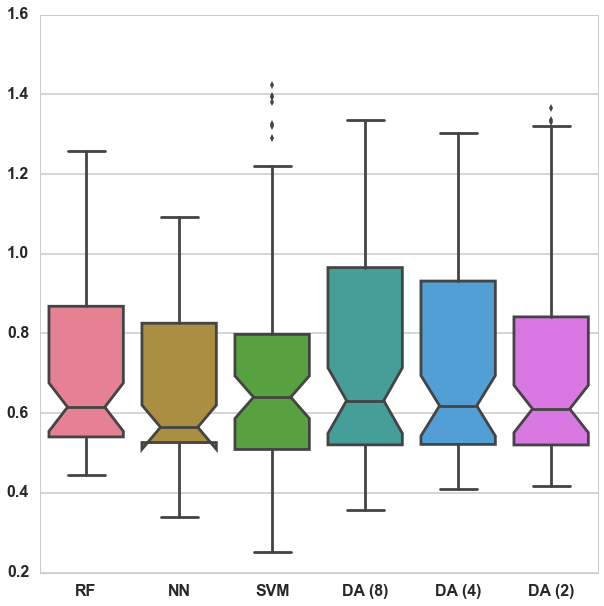

In [7]:
df = load_data('3')
# Randomness 
expected_e = {1:1, 2: 1, 4:0.6875, 8:0.64, 16:0.6}
results_df = pd.DataFrame()
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (8)', 'DA (4)', 'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

print(four_col.shape)
for e in four_col['effects'].unique():
    df_select = four_col.loc[(four_col['effects'] == e)]
    df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

    results_df = pd.concat([results_df, (df_select / expected_e[e])])
    print(results_df.shape)

print(results_df.mean())
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)
# g.set_title('Percent of Expected Max Classification')

C.) Model 4 - This model is very difficult to classify (turn magnitude up and limit number of effects for best results). You could also threshold where no model learns (all below 0.6) or something similar

Index(['da_10000_128_fullrfc', 'da_10000_128_nearest_neighbors',
       'da_10000_128_rfc', 'da_10000_128_svm', 'da_10000_128_tree',
       'da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_64_fullrfc',
       'da_10000_64_nearest_neighbors', 'da_10000_64_rfc', 'da_10000_64_svm',
       'da_10000_64_tree', 'da_10000_8_fullrfc',
       'da_10000_8_nearest_neighbors', 'da_10000_8_rfc', 'da_10000_8_svm',
       'da_10000_8_tree', 'effects', 'fullrfc', 'mag', 'missing', 'model',
       'nearest_neighbors', 'observed', 'patients', 'per_effect', 'rfc', 'svm',
       'tree', 'trial'],
      dtype='object')


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


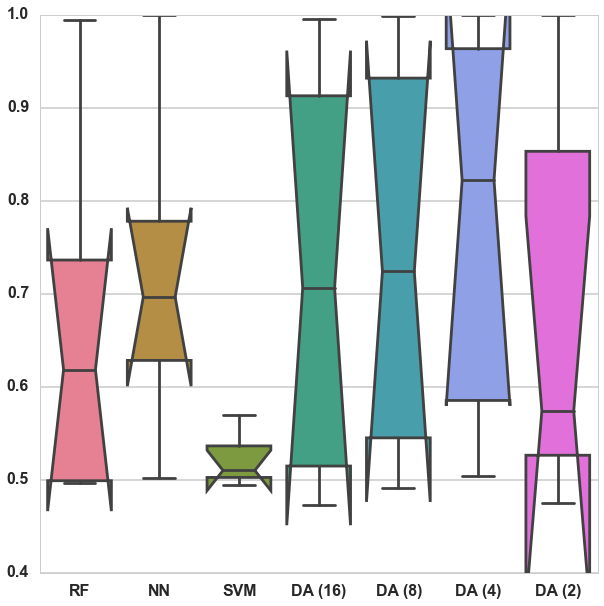

In [8]:
df = load_data('4')

results_df = pd.DataFrame()
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (16)', 'DA (8)', 'DA (4)',
                   'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

df_select = four_col
df_select = four_col.loc[(four_col['effects'] <= 4) & (four_col['patients']== 2000)]
df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

results_df = pd.concat([results_df, (df_select)])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)

Index(['da_10000_128_fullrfc', 'da_10000_128_nearest_neighbors',
       'da_10000_128_rfc', 'da_10000_128_svm', 'da_10000_128_tree',
       'da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_64_fullrfc',
       'da_10000_64_nearest_neighbors', 'da_10000_64_rfc', 'da_10000_64_svm',
       'da_10000_64_tree', 'da_10000_8_fullrfc',
       'da_10000_8_nearest_neighbors', 'da_10000_8_rfc', 'da_10000_8_svm',
       'da_10000_8_tree', 'effects', 'fullrfc', 'mag', 'missing', 'model',
       'nearest_neighbors', 'observed', 'patients', 'per_effect', 'rfc', 'svm',
       'tree', 'trial'],
      dtype='object')


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


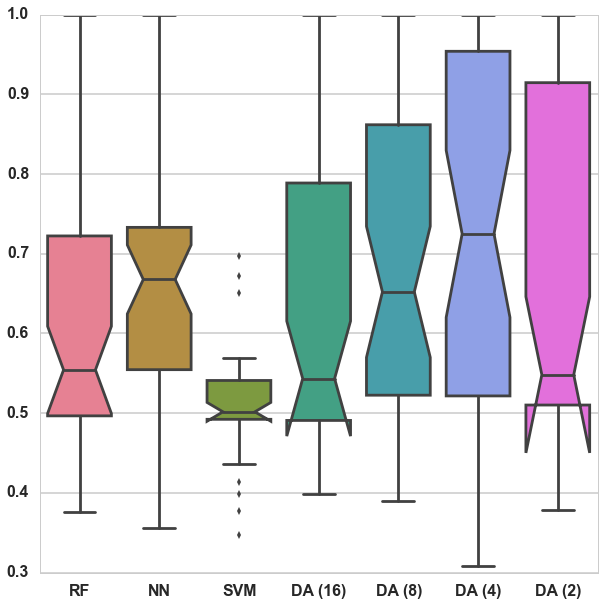

In [9]:
df = load_data('4')

results_df = pd.DataFrame()
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (16)', 'DA (8)', 'DA (4)',
                   'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

df_select = four_col
df_select = four_col.loc[(four_col['effects'] <= 4)]
df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

results_df = pd.concat([results_df, (df_select)])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)

Index(['da_10000_128_fullrfc', 'da_10000_128_nearest_neighbors',
       'da_10000_128_rfc', 'da_10000_128_svm', 'da_10000_128_tree',
       'da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_64_fullrfc',
       'da_10000_64_nearest_neighbors', 'da_10000_64_rfc', 'da_10000_64_svm',
       'da_10000_64_tree', 'da_10000_8_fullrfc',
       'da_10000_8_nearest_neighbors', 'da_10000_8_rfc', 'da_10000_8_svm',
       'da_10000_8_tree', 'effects', 'fullrfc', 'mag', 'missing', 'model',
       'nearest_neighbors', 'observed', 'patients', 'per_effect', 'rfc', 'svm',
       'tree', 'trial'],
      dtype='object')
(63, 10)
RF         0.509330
NN         0.490055
SVM        0.4897

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


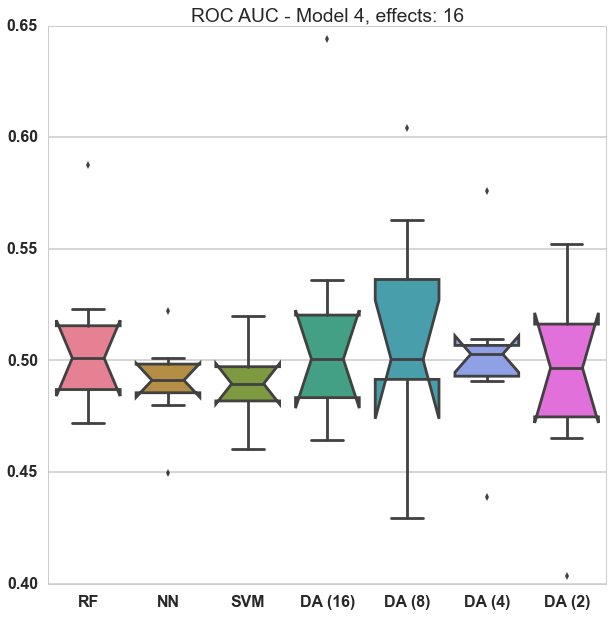

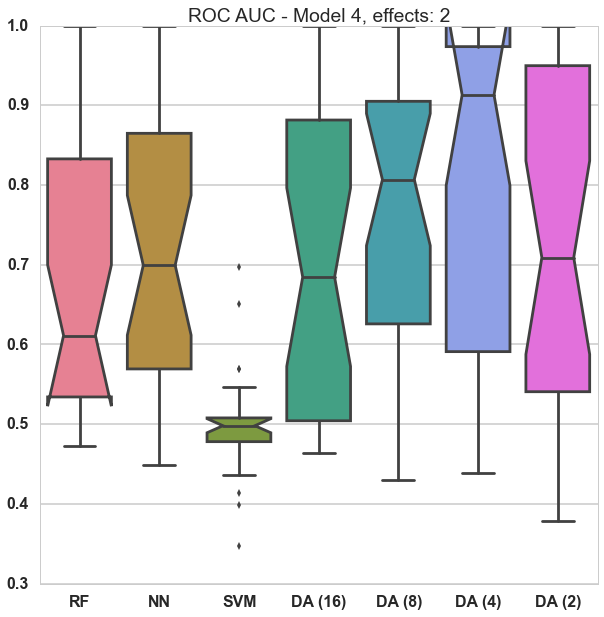

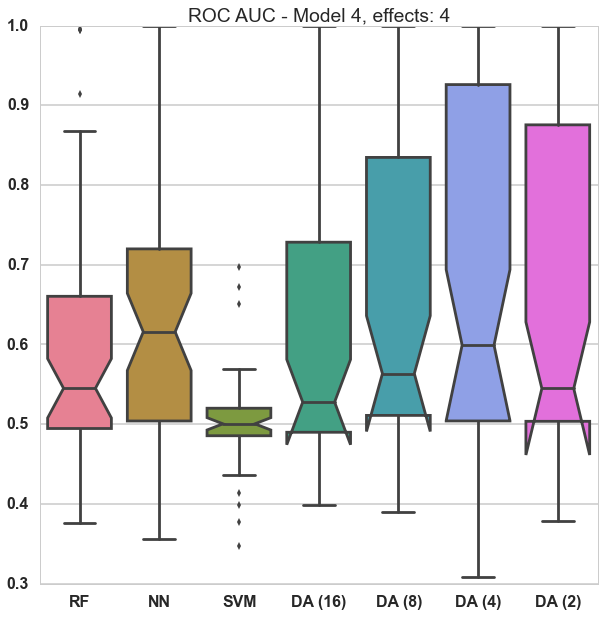

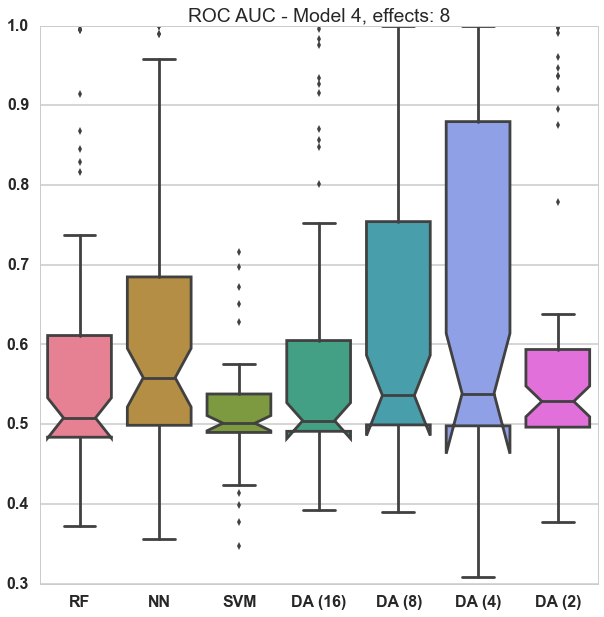

In [10]:
df = load_data('4')
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (16)', 'DA (8)', 'DA (4)',
                   'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

results_df = pd.DataFrame()
print(four_col.shape)
for e in four_col['effects'].unique():
    df_select = four_col.loc[(four_col['effects'] == e)]
    df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)
    results_df = pd.concat([results_df, (df_select)])
    
    print(results_df.mean())
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=results_df, palette="husl", notch=True)
    g.set_title('ROC AUC - Model 4, effects: ' + str(e))

### FIgure 4 - Missing Data

Index(['da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


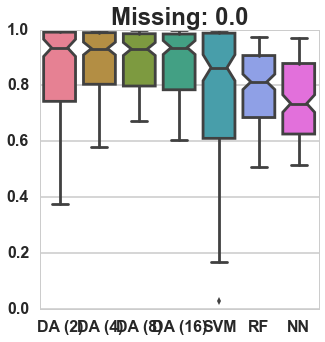

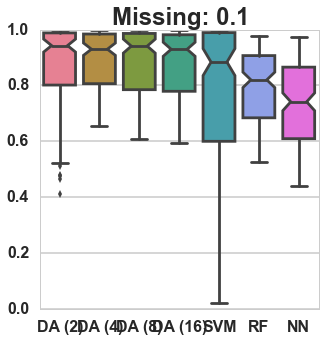

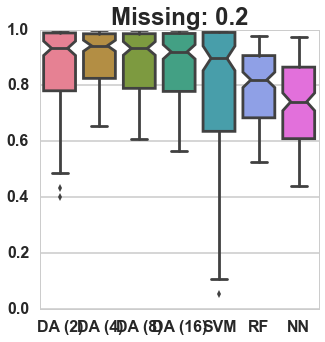

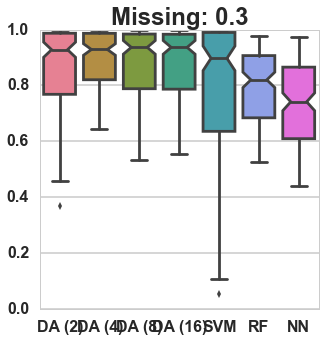

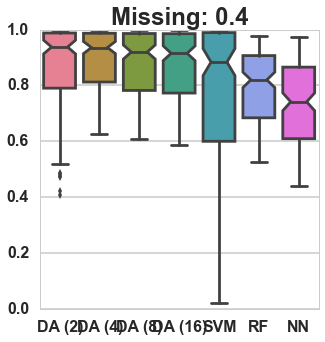

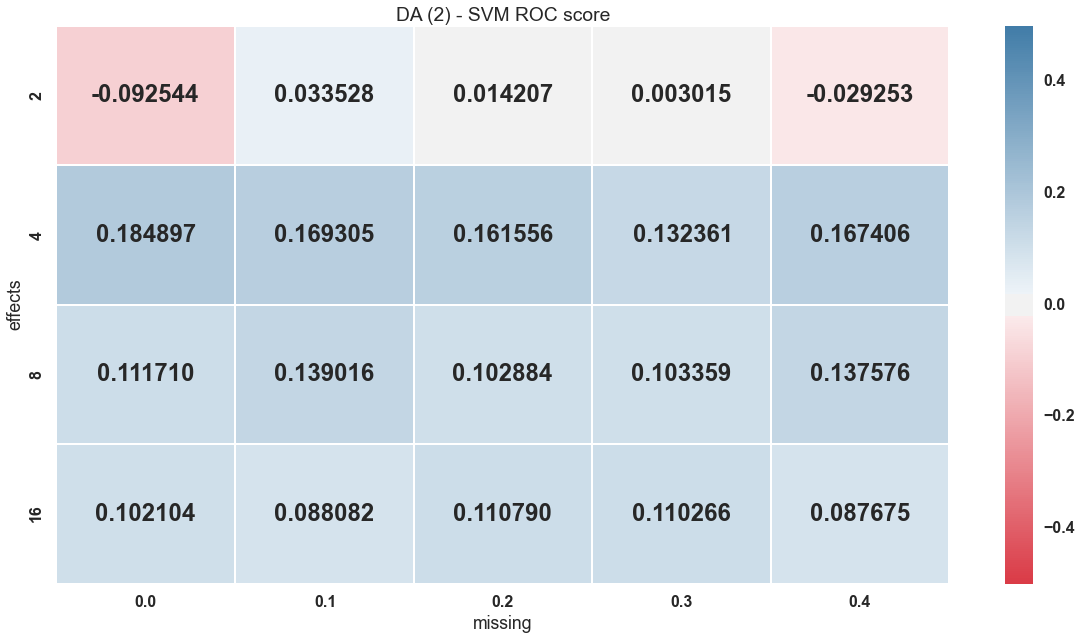

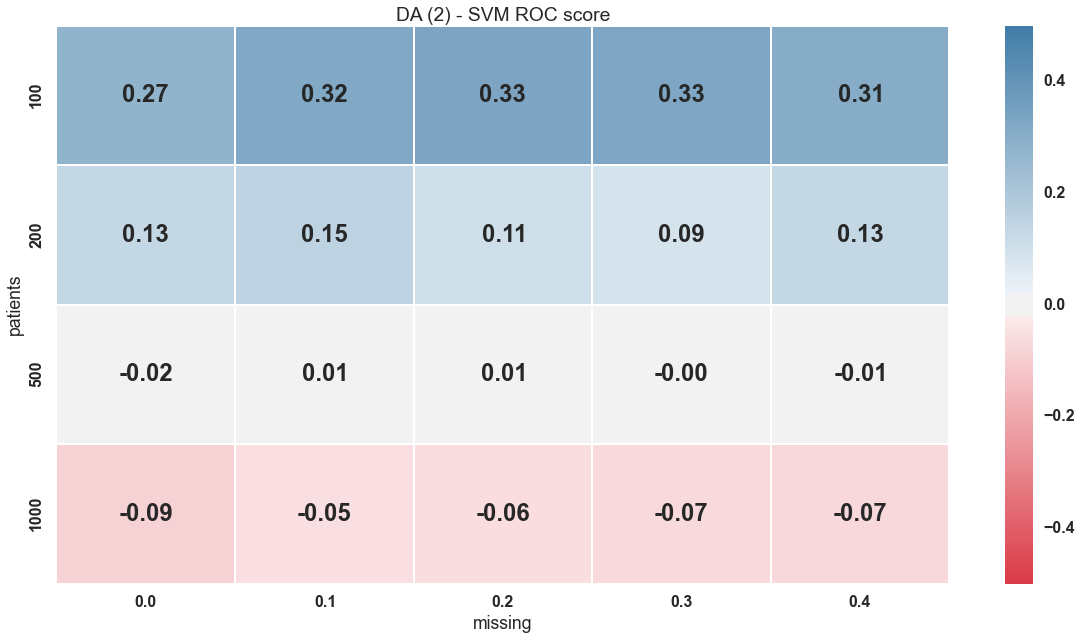

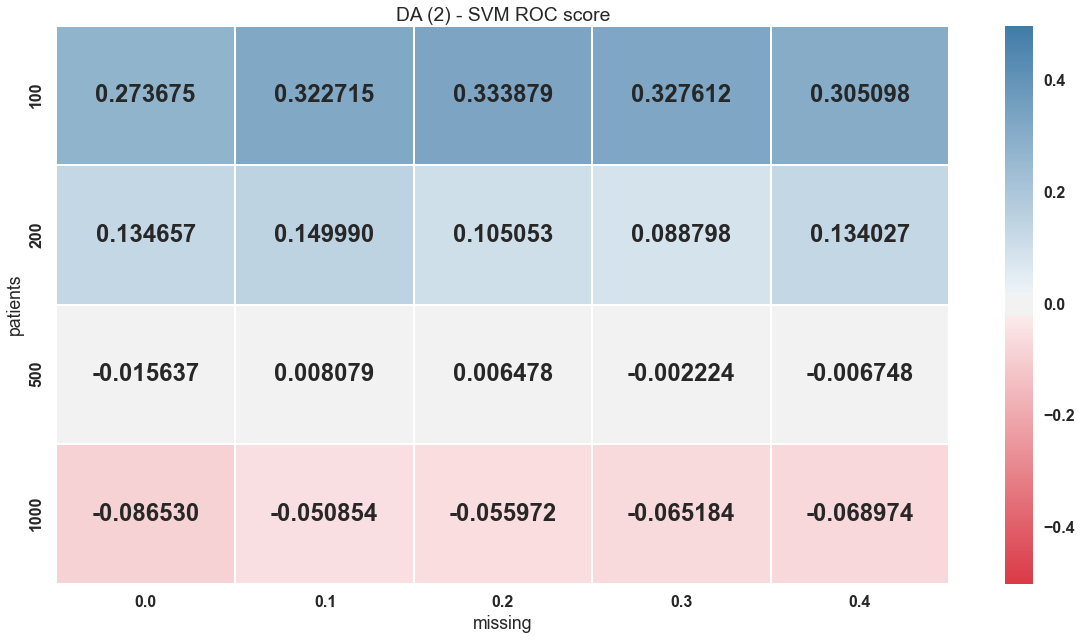

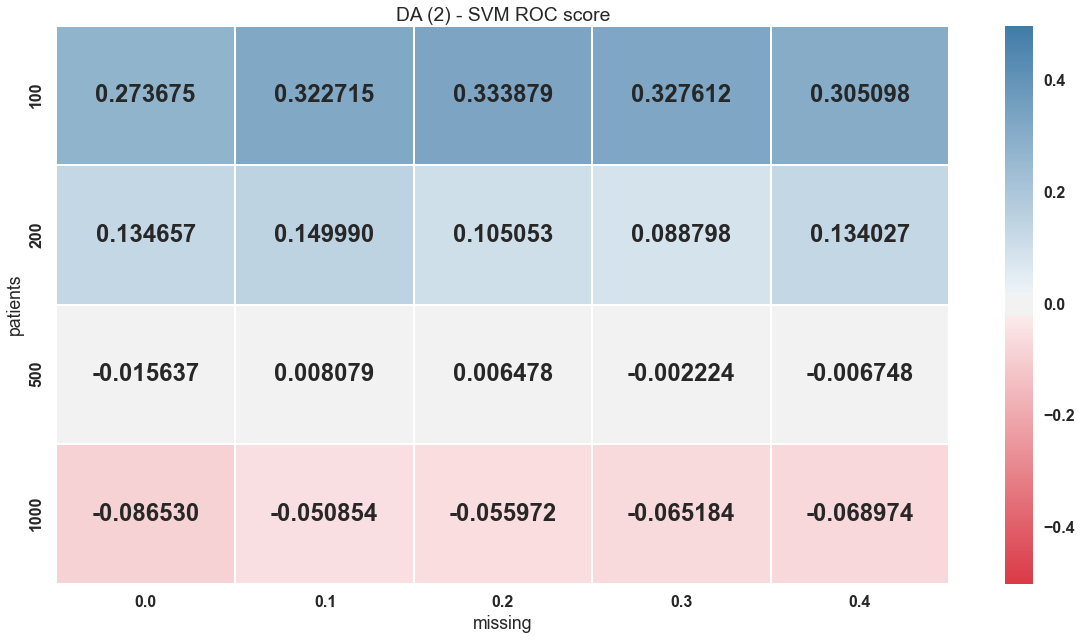

In [12]:
df = load_data('1_md')

# print(df.shape)
# print(df[['missing', 'diff']])

hidden_nodes = [1, 2, 4, 8, 16]
da_classifier_list = []
for n in hidden_nodes:
    da = 'DA (' + str(n) + ')'
    if (da in df.columns):
        da_classifier_list.append(da)

methods = da_classifier_list + [comparison_classifier, 'RF', 'NN']
for m in df['missing'].unique():
    df = df.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})
    df_select = df.loc[(df['missing'] == m)] # & (df['effects'] == 2)]
    vals = df_select[methods]
    plt.figure(figsize=(5,5))
    plt.rc('font', **font)
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=vals, notch=True, palette="husl")
    g.set_title('Missing: ' + str(m), fontdict=font)

plt.figure(figsize=(20,10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="effects", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

plt.figure(figsize=(20,10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt=".2f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

# diff for number of nodes 
# diff_2_4 =
# diff_4_8 =

plt.figure(figsize=(20, 10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

plt.figure(figsize=(20, 10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


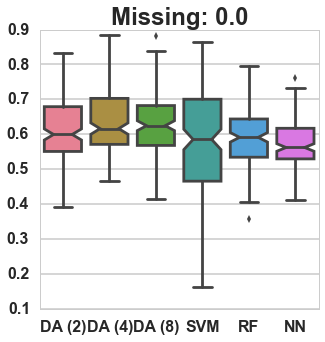

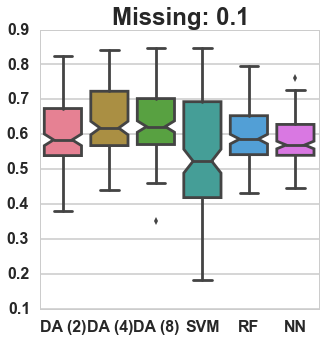

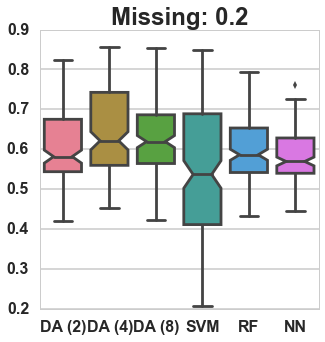

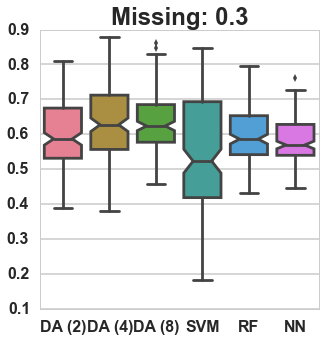

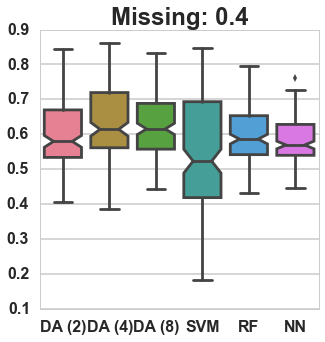

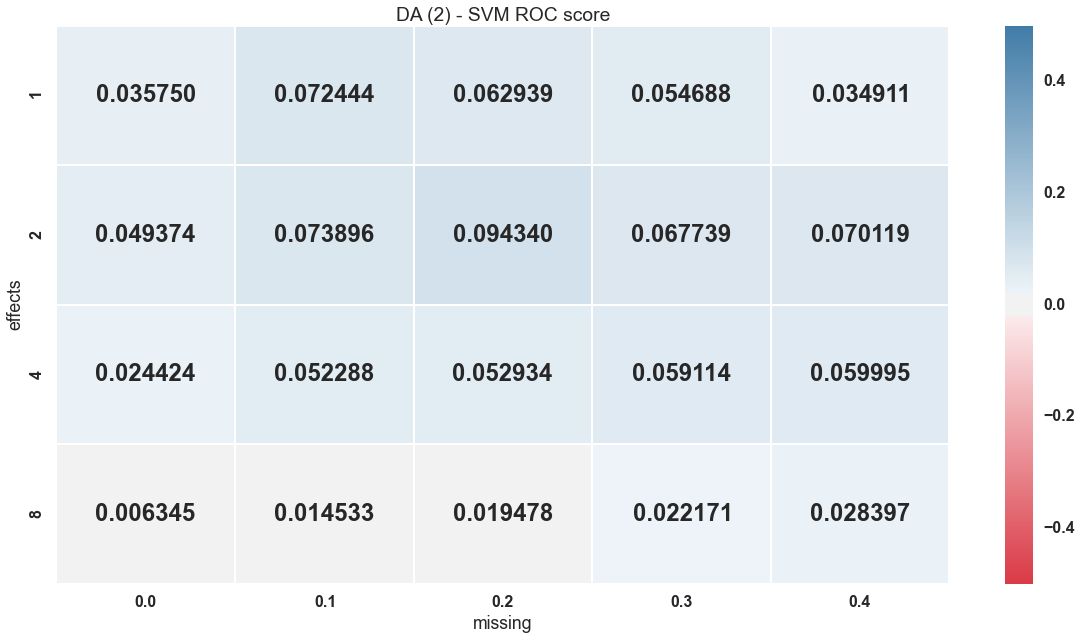

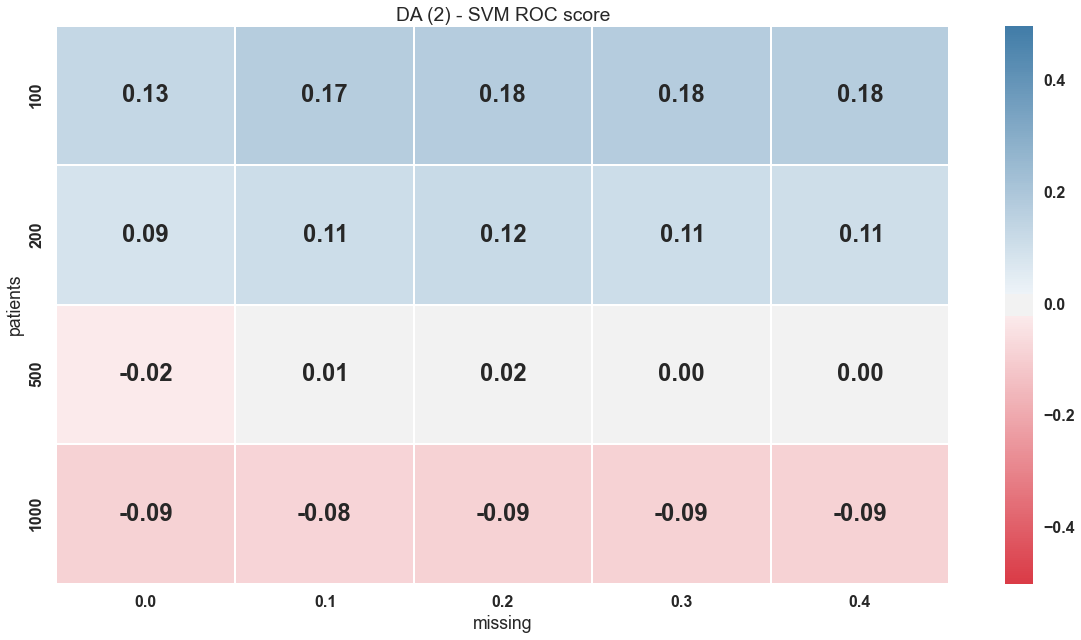

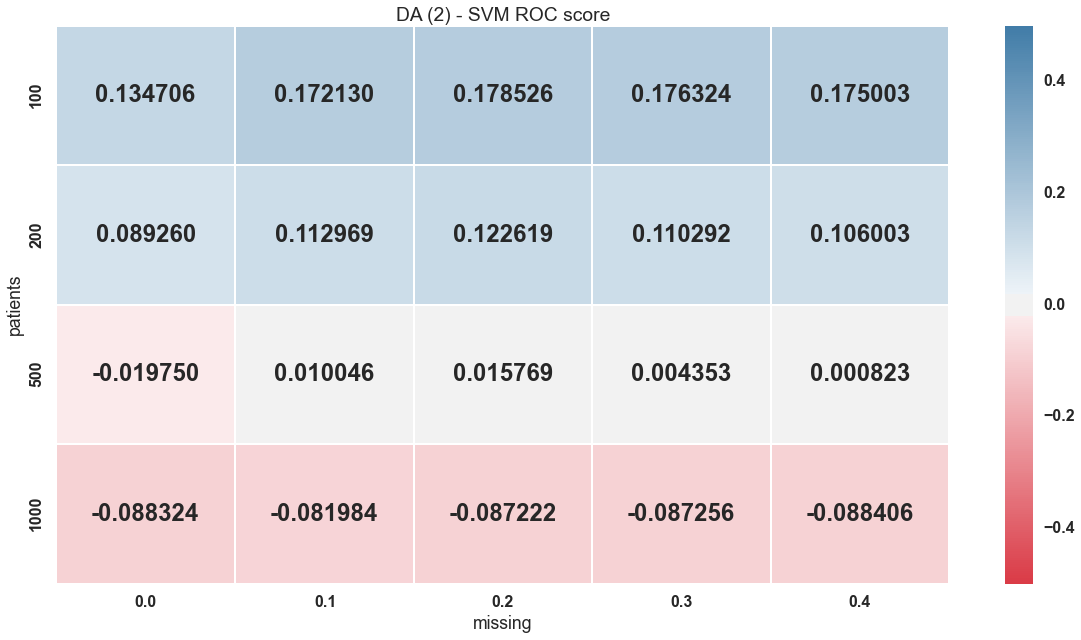

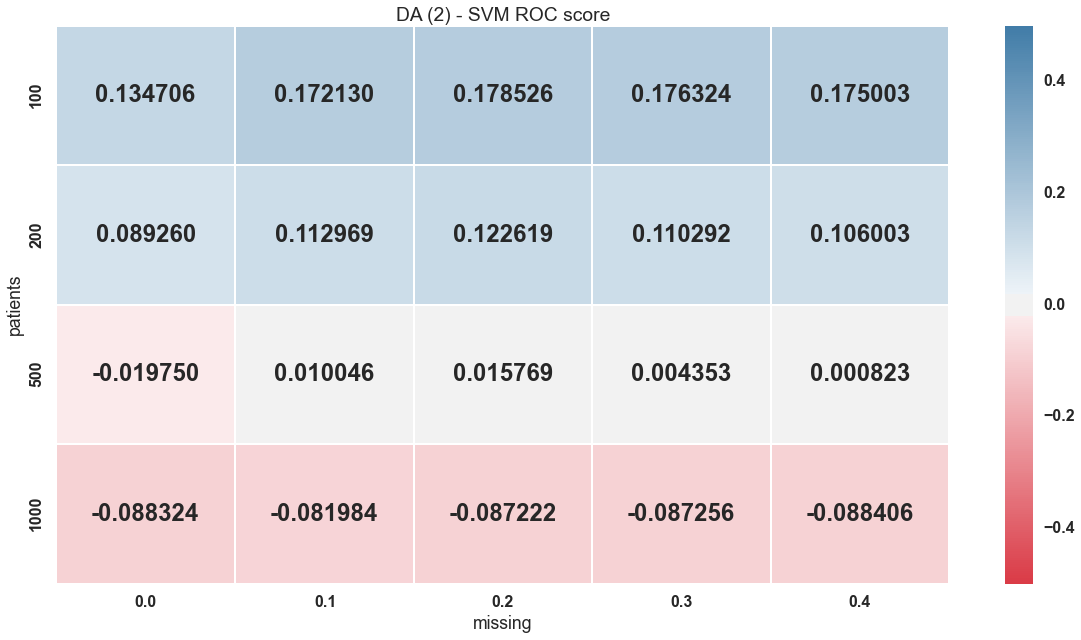

In [13]:
df = load_data('3_md')

# print(df.shape)
# print(df[['missing', 'diff']])

hidden_nodes = [1, 2, 4, 8, 16]
da_classifier_list = []
for n in hidden_nodes:
    da = 'DA (' + str(n) + ')'
    if (da in df.columns):
        da_classifier_list.append(da)

methods = da_classifier_list + [comparison_classifier, 'RF', 'NN']
for m in df['missing'].unique():
    df = df.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})
    df_select = df.loc[(df['missing'] == m)] # & (df['effects'] == 2)]
    vals = df_select[methods]
    plt.figure(figsize=(5,5))
    plt.rc('font', **font)
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=vals, notch=True, palette="husl")
    g.set_title('Missing: ' + str(m), fontdict=font)

plt.figure(figsize=(20,10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="effects", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

plt.figure(figsize=(20,10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt=".2f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

# diff for number of nodes 
# diff_2_4 =
# diff_4_8 =

plt.figure(figsize=(20, 10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

plt.figure(figsize=(20, 10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

### Figure 5 + 6 See Cluster.ipynb